In [229]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [230]:
global df
df=pd.read_csv("C:\\Users\\mokit\\OneDrive\\Documents\\SSN\\Data Science\\heart.csv")
df.rename(columns={
    "age":"Age",
    "sex":"Sex",
    "cp":"ChestPain",
    "trestbps":"RestingBloodPressure",
    "chol":"Cholesterol",
    "fbs":"FastingBloodSugar",
    "restecg":"RestingECG",
    "thalach":"MaxHeartRate",
    "exang":"ExcerciseAngina",
    "oldpeak":"OldPeak",
    "slope":"STSlope",
    "ca":"nMajorVessels",
    "thal":"Thalium",
    "target":"Status"
}, inplace=True)
df.head()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [231]:
print("Dimensionality of original data:",df.shape)
print("Number of duplicate records:",df.duplicated().sum())
#There are 723 duplicate records and these must be removed
df = df.drop_duplicates()
print("Dimensionality of new data:",df.shape)

Dimensionality of original data: (1025, 14)
Number of duplicate records: 723
Dimensionality of new data: (302, 14)


In [232]:

df.describe()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [233]:
def find_outliers(df,feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print("Lower Bound:", lower_bound)
    print("Upper Bound:", upper_bound)
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print("Outliers:", len(outliers))

    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

outliers={}

def plot(feature):
    fig, ax = plt.subplots(1, 1, figsize=(12, 3))
    plt.ylabel('Frequency')
    plt.xlabel(feature)
    plt.hist(np.array(df[feature]), 
             bins = 10, 
             density = True)
    ax.axvline(x = np.mean(df[feature]), 
               color = [1, 0, 0])
    plt.tight_layout()
    plt.show()
    
def check_null(feature):
    if df[feature].isnull().any():
        print(f"Feature '{feature}' contains null values")
        df[feature] = df[feature].fillna(df[feature].mean())
    else:
        print("No null values found in",feature)
              
def plot_value_counts(feature):
    value_counts = df[feature].value_counts()

    fig, ax = plt.subplots(figsize=(12, 3))
    value_counts.plot(kind='bar', ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Value Counts of {feature}')
    plt.xticks(rotation=90)
    plt.show()

No null values found in Age


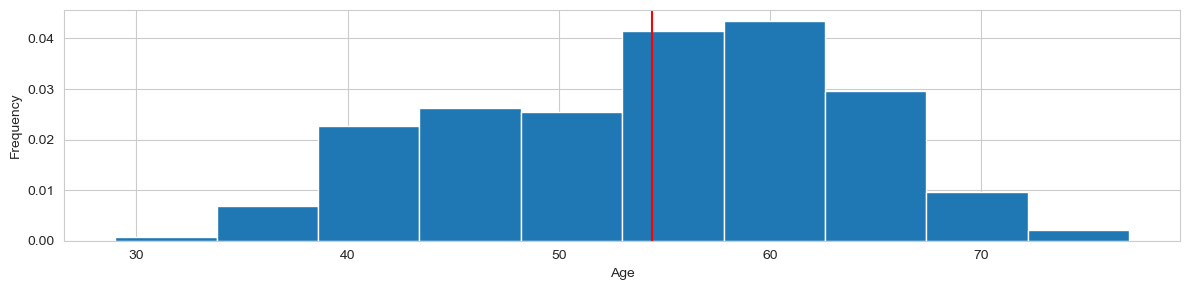

Lower Bound: 28.5
Upper Bound: 80.5
Outliers: 0


In [234]:
check_null('Age')
plot('Age')
df = find_outliers(df,'Age')


No null values found in Sex


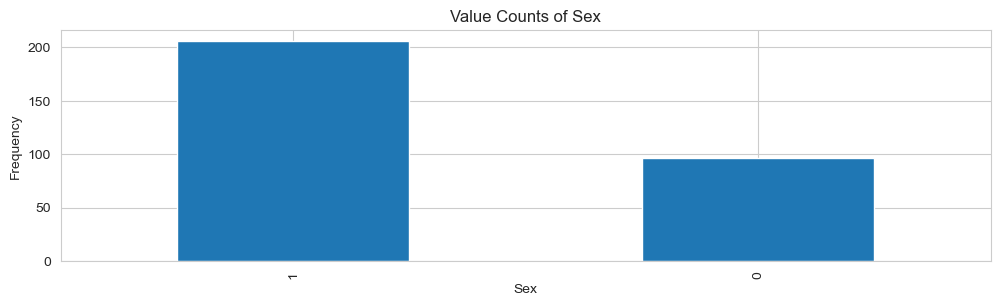

1: Male
0: Female


In [235]:
check_null('Sex')
plot_value_counts('Sex')
print('''1: Male
0: Female''')

No null values found in ChestPain


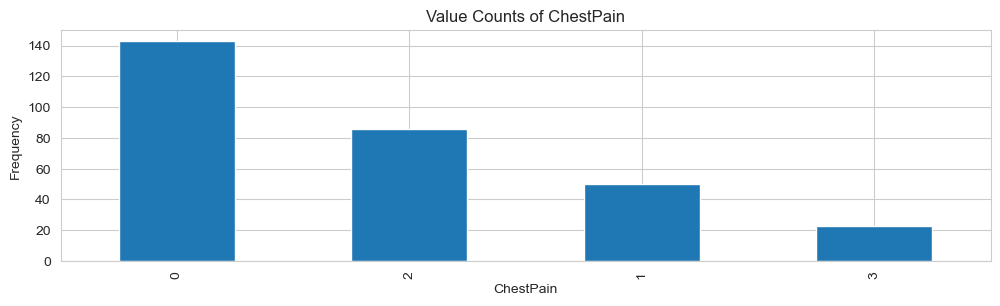

0: Typical angina
1: Atypical angina
2: Non-anginal pain
3: Asymptomatic


In [236]:
check_null('ChestPain')
plot_value_counts('ChestPain')
print('''0: Typical angina
1: Atypical angina
2: Non-anginal pain
3: Asymptomatic''')

No null values found in RestingBloodPressure
Distribution before removing outliers


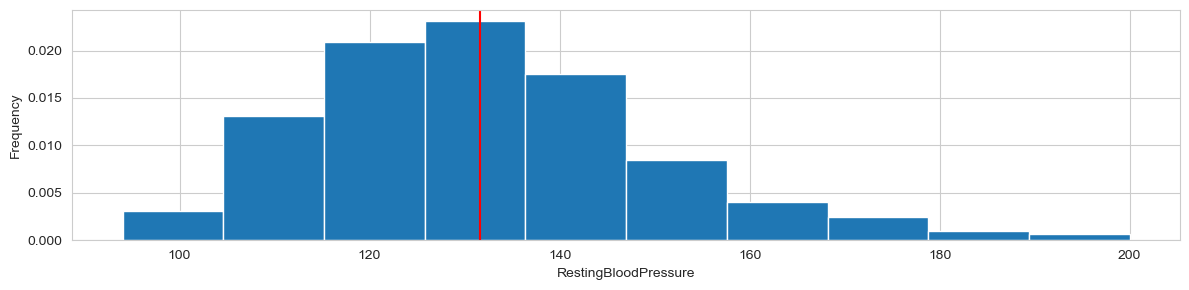

Lower Bound: 90.0
Upper Bound: 170.0
Outliers: 9
Distribution after removing outliers


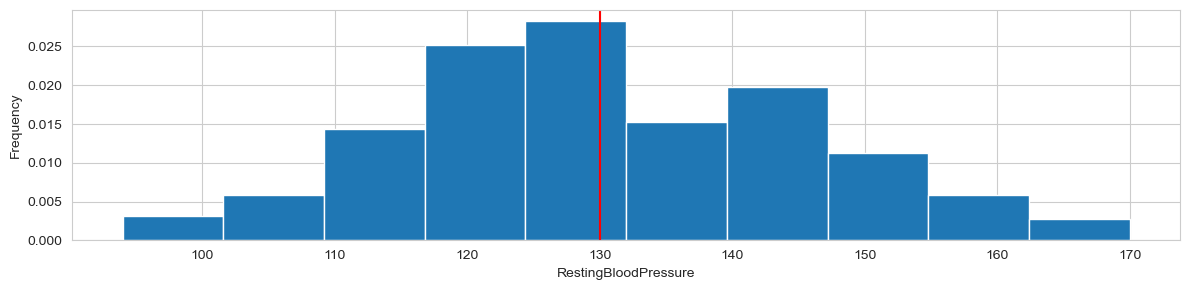

In [237]:
check_null('RestingBloodPressure')
print("Distribution before removing outliers")
plot('RestingBloodPressure')
df = find_outliers(df,'RestingBloodPressure')

print("Distribution after removing outliers")
plot('RestingBloodPressure')

No null values found in Cholesterol

Distribution before removing outliers:


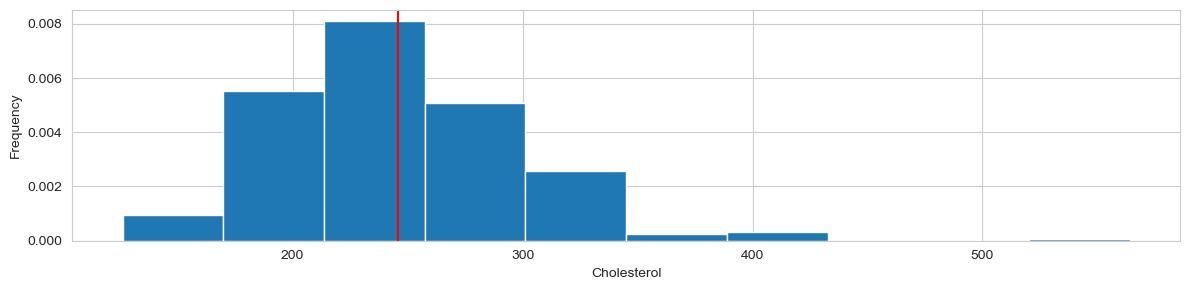

Lower Bound: 116.5
Upper Bound: 368.5
Outliers: 5
Distribution after removing outliers:


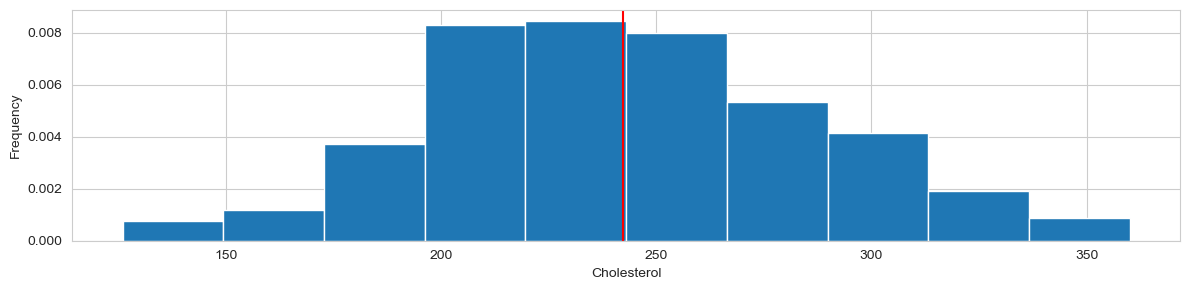

In [238]:
check_null('Cholesterol')
print("\nDistribution before removing outliers:")
plot('Cholesterol')
df = find_outliers(df,'Cholesterol')

print("Distribution after removing outliers:")
plot('Cholesterol')

No null values found in FastingBloodSugar


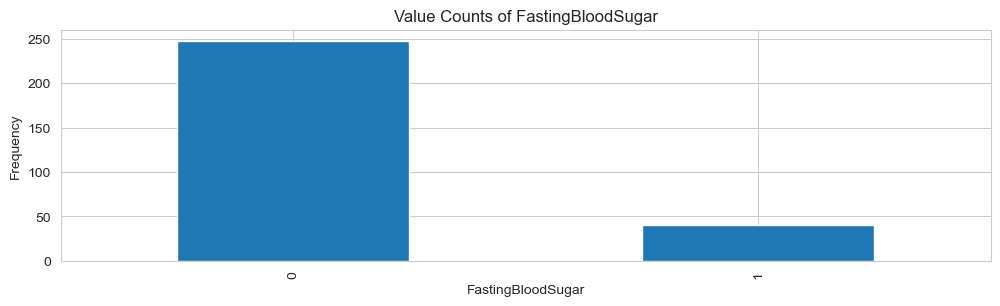

0: False
1: True


In [239]:
check_null('FastingBloodSugar')
plot_value_counts('FastingBloodSugar')
print('''0: False
1: True''')

No null values found in RestingECG


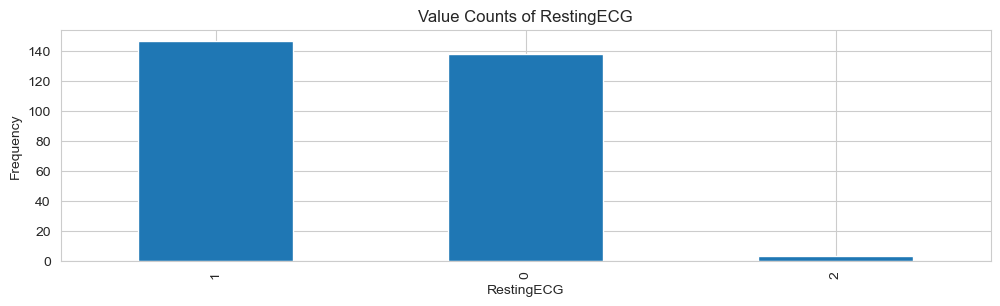

0:Normal
1:Abnormality
2:Hypertrophy


In [240]:
check_null('RestingECG')
plot_value_counts('RestingECG')
print('''0:Normal
1:Abnormality
2:Hypertrophy''')

No null values found in MaxHeartRate

Distribution before removing outliers:


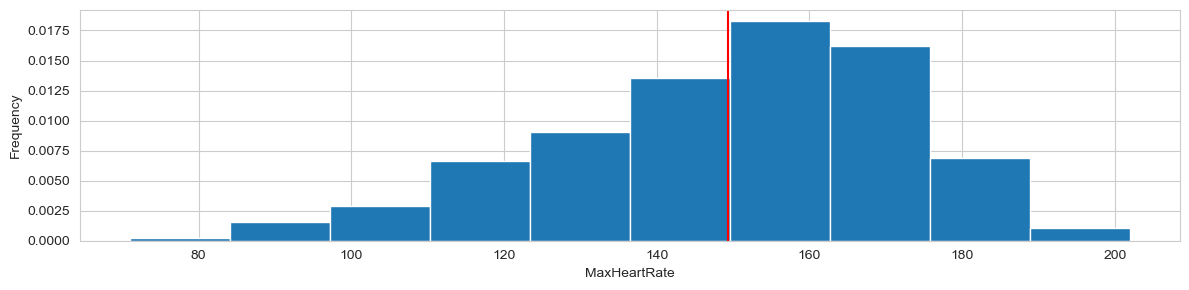

Lower Bound: 79.125
Upper Bound: 220.125
Outliers: 1
Distribution after removing outliers:


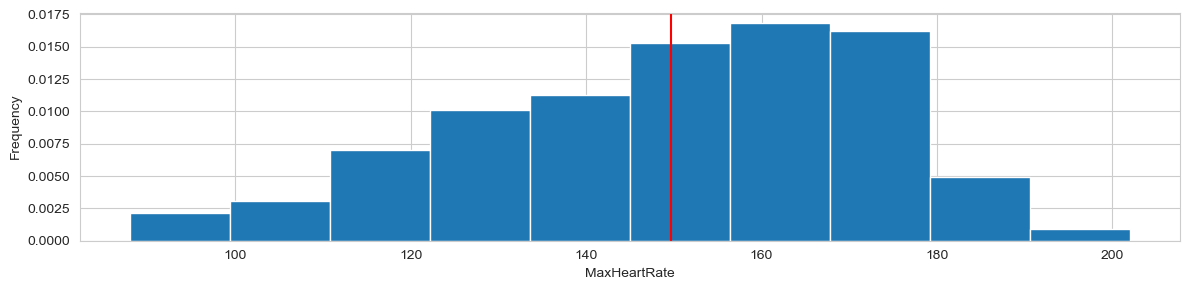

In [241]:
check_null('MaxHeartRate')
print("\nDistribution before removing outliers:")
plot('MaxHeartRate')
df = find_outliers(df,'MaxHeartRate')

print("Distribution after removing outliers:")
plot('MaxHeartRate')

No null values found in ExcerciseAngina


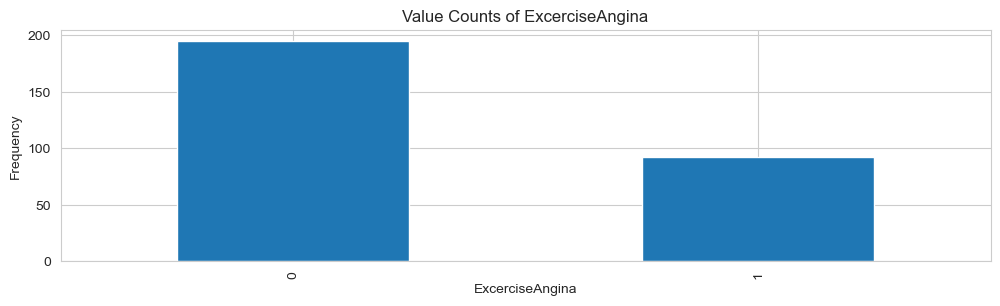

0: No
1: Yes


In [242]:
check_null('ExcerciseAngina')
plot_value_counts('ExcerciseAngina')
print('''0: No
1: Yes''')

No null values found in OldPeak

Distribution before removing outliers:


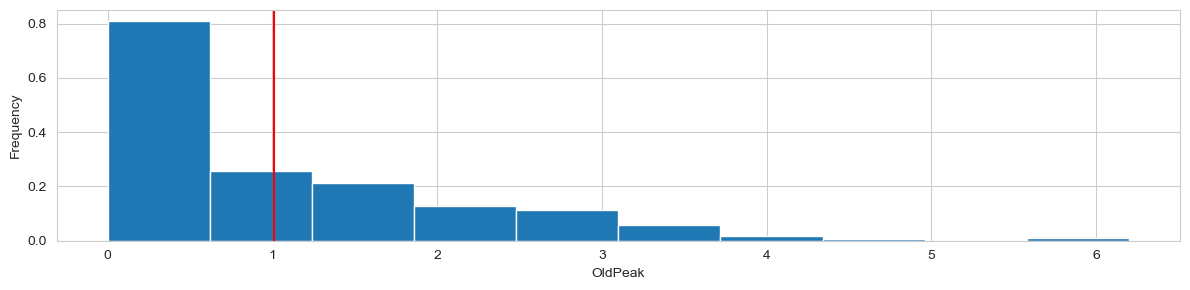

Lower Bound: -2.4000000000000004
Upper Bound: 4.0
Outliers: 4
Distribution after removing outliers:


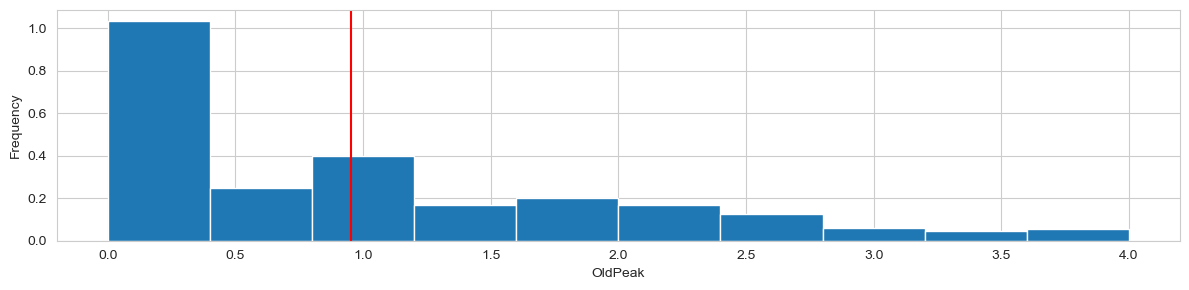

In [243]:
check_null('OldPeak')
print("\nDistribution before removing outliers:")
plot('OldPeak')
df = find_outliers(df,'OldPeak')

print("Distribution after removing outliers:")
plot('OldPeak')

No null values found in STSlope


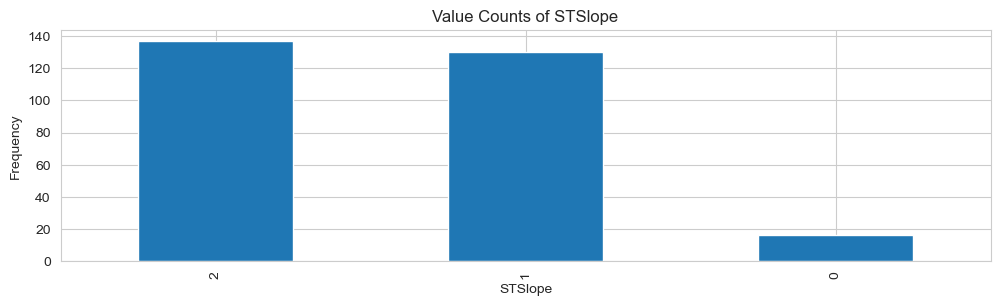

0:Upsloping
1:Flat
2:Downsloping


In [244]:
check_null('STSlope')
plot_value_counts('STSlope')
print('''0:Upsloping
1:Flat
2:Downsloping''')

No null values found in nMajorVessels


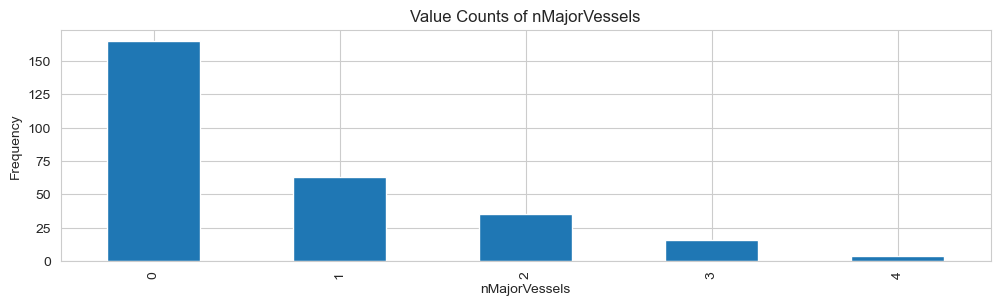

In [245]:
check_null('nMajorVessels')
plot_value_counts('nMajorVessels')


No null values found in Thalium


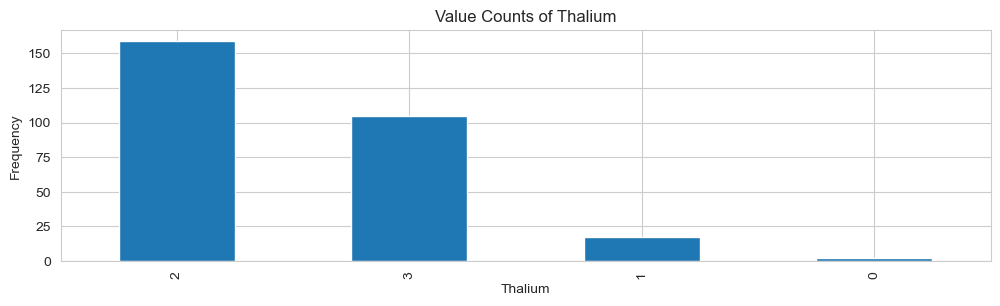

0:Normal
1:Fixed defect
2:Reversible defect
3:Not described


In [246]:
check_null('Thalium')
plot_value_counts('Thalium')
print('''0:Normal
1:Fixed defect
2:Reversible defect
3:Not described''')

No null values found in Status


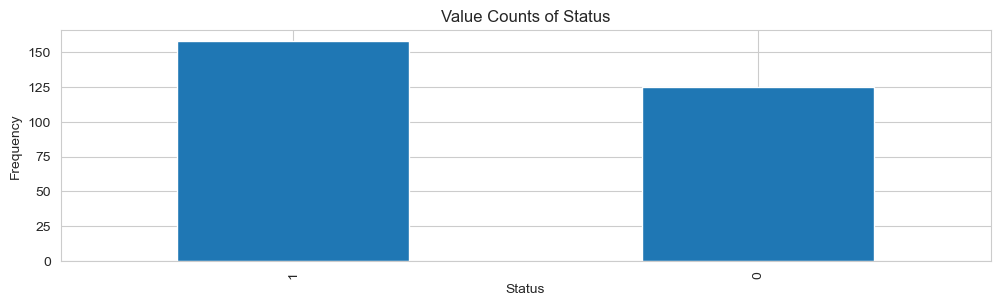

0: No disease
1: Heart disease


In [247]:
check_null('Status')
plot_value_counts('Status')
print('''0: No disease
1: Heart disease''')

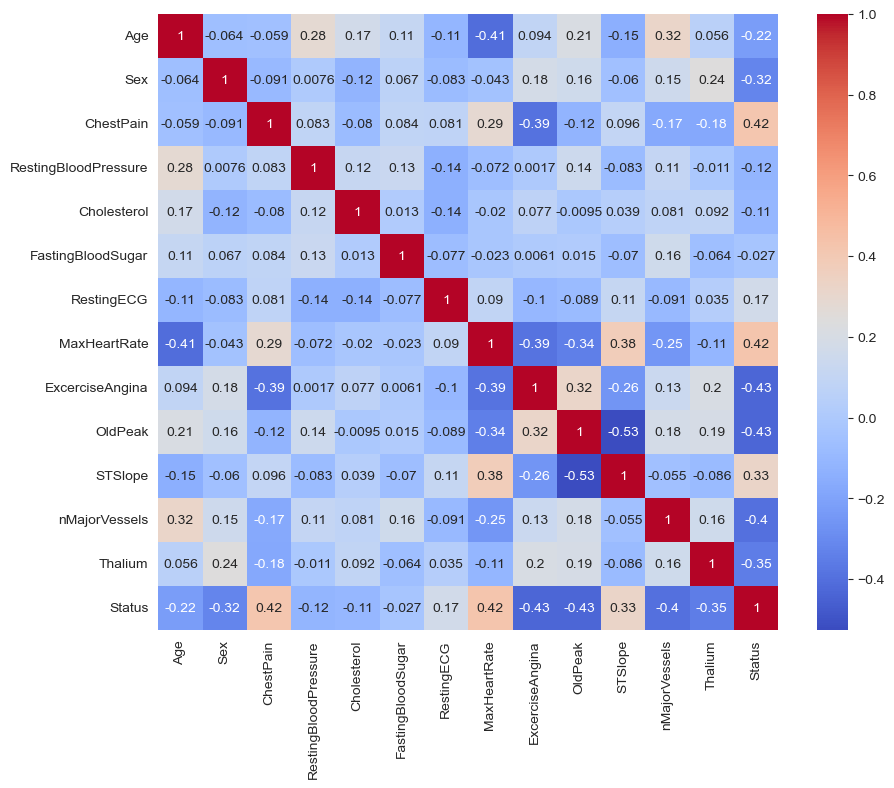

In [248]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Accuracy: 0.8596491228070176
Precision: 0.8484848484848485
Recall: 0.9032258064516129
F1 Score: 0.875
Confusion Matrix:
 [[21  5]
 [ 3 28]]


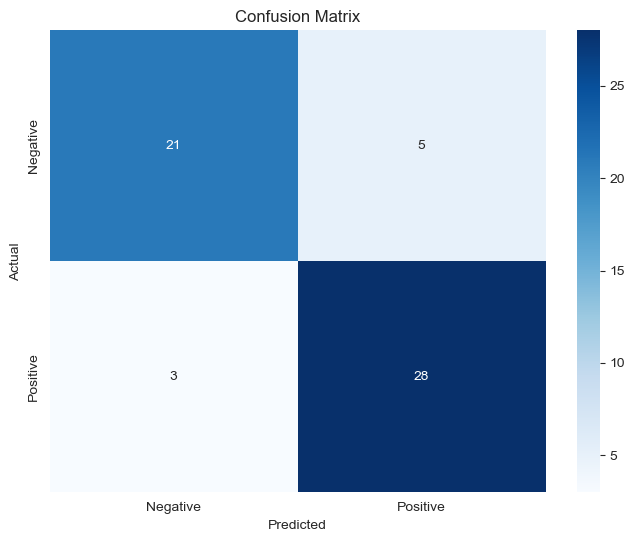

In [249]:
X = df.drop('Status', axis = 1)
y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()